In [19]:
import matplotlib.pyplot as plt
import numpy as np

## Eulerova metoda:

In [20]:
def e_funkce(x_n,y_n):
    return (y_n**2+1)/(x_n*y_n)

def eulerova_metoda(x_0, y_0, x_max, h):
    x, y = [x_0], [y_0]
    
    while x[-1] < x_max:
        y.append(y[-1]+ h * e_funkce(x[-1], y[-1]))
        x.append(x[-1]+h)
    
    return x,y

## Analyticke reseni

In [21]:
def analyticke_reseni(x_0, y_0, x_max, h):
    y = [np.sqrt(5*i**2 -1) for i in np.arange(x_0, x_max,h)]
    x = [i for i in np.arange(x_0,x_max,h)]
    return x,y

## Modifikovaná Eulerova metoda

In [22]:
def modifik_euler(x_0, y_0, x_max, h):
    x,y = [x_0], [y_0]
    while x[-1] < x_max:
        y_pul = y[-1]+ (h/2) * e_funkce(x[-1], y[-1])
        y.append(y[-1] + h * e_funkce(x[-1]+h, y_pul+h/2))
        x.append(x[-1]+h)
    return x,y

## Vysledky

Pocatecni podminky

In [23]:
x_0, y_0 = 1.0, 2.0
x_max = 5.0
h = 0.0001
parametry = [x_0,y_0,x_max,h]

In [24]:
e_x,e_y = eulerova_metoda(*parametry)
m_x, m_y = modifik_euler(*parametry)
a_x,a_y = analyticke_reseni(*parametry)

In [25]:
euler_chyba = np.abs(np.array(e_y[:-1]) - np.array(a_y))
euler_modif_chyba = np.abs(np.array(m_y[:-1])- np.array(a_y))

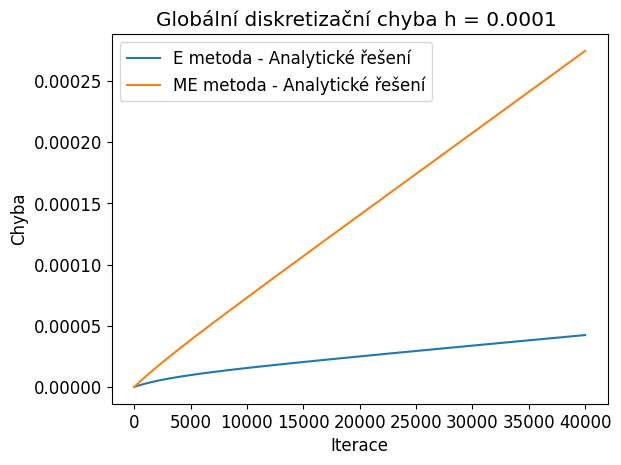

In [26]:
plt.rcParams.update({'font.size': 12})
plt.title(f"Globální diskretizační chyba h = {h} ")
plt.plot(euler_chyba, label = "E metoda - Analytické řešení")
plt.plot(euler_modif_chyba,label = "ME metoda - Analytické řešení")
plt.legend(loc = "upper left")
plt.xlabel("Iterace")
plt.ylabel("Chyba")
plt.show()

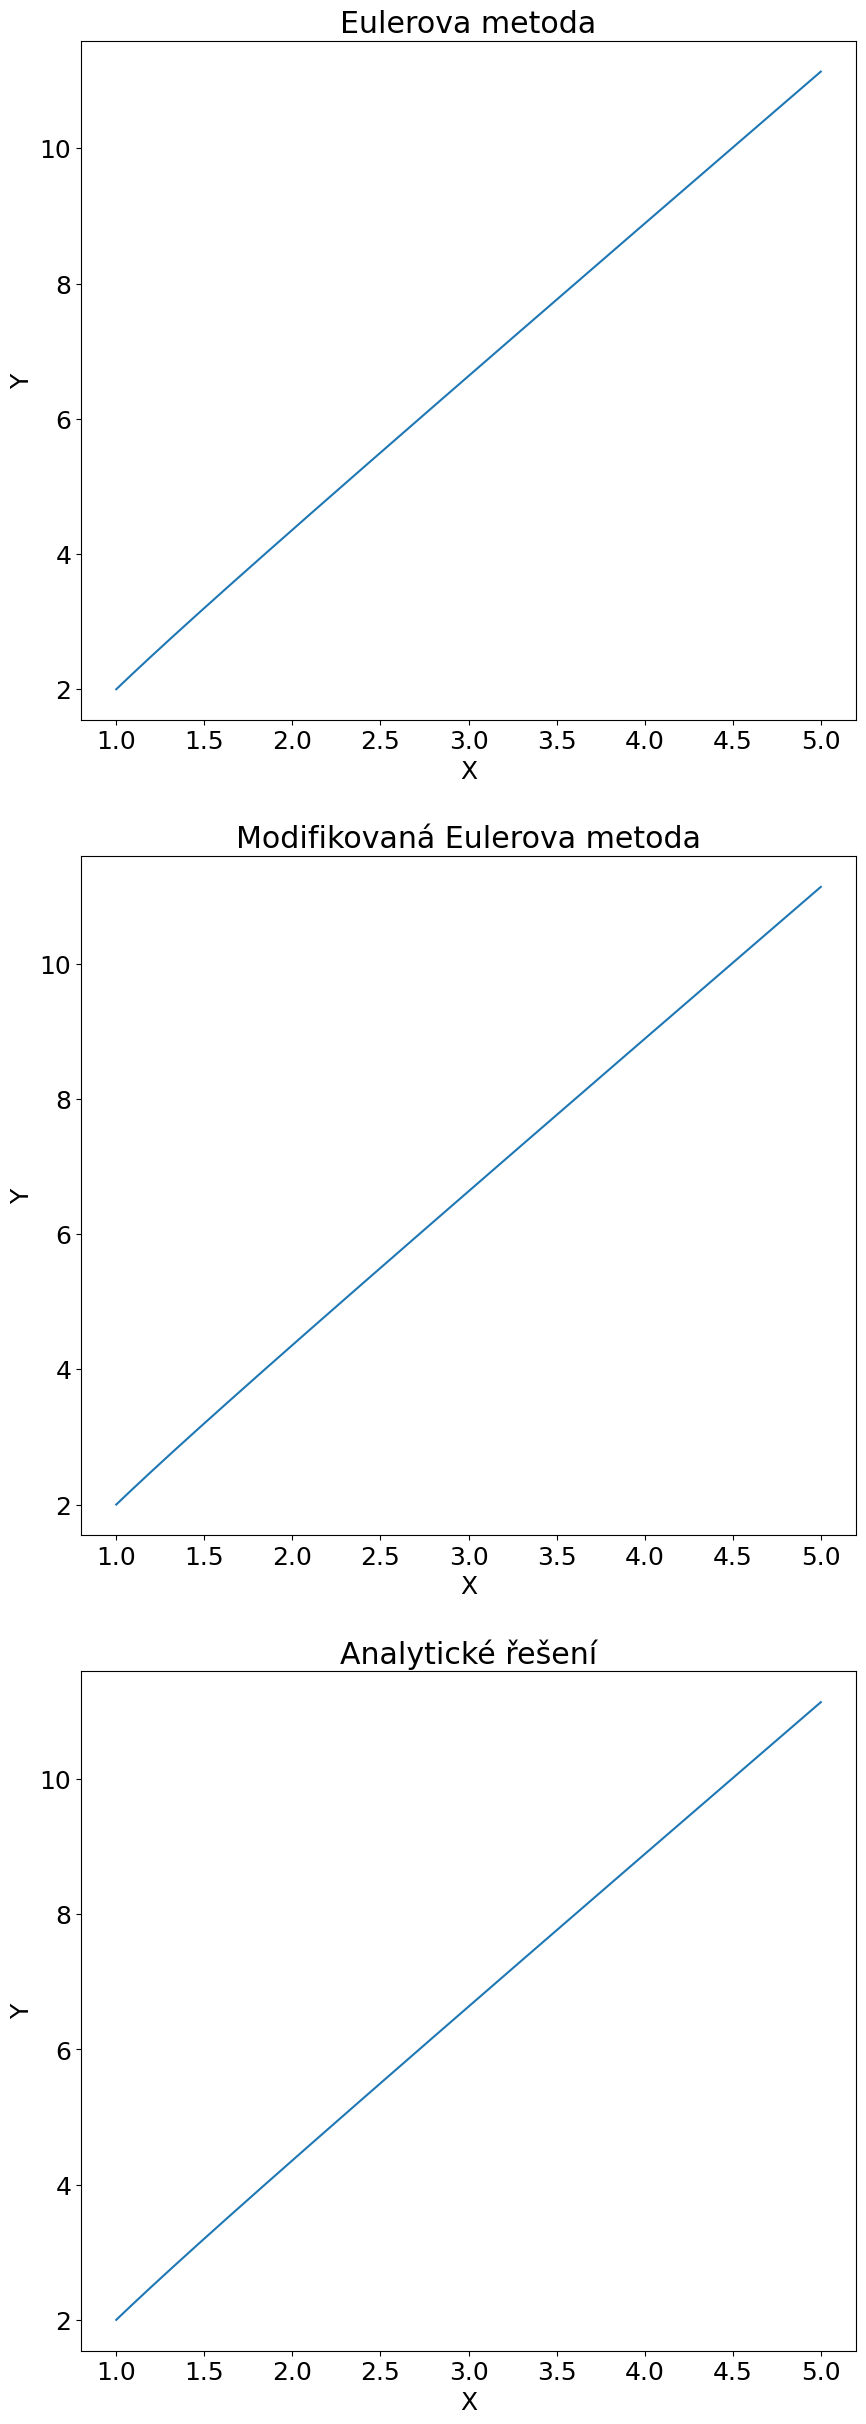

In [27]:
nazvy = ["Eulerova metoda", "Modifikovaná Eulerova metoda", "Analytické řešení"]
metody = [eulerova_metoda, modifik_euler, analyticke_reseni]
parametry = [x_0,y_0,x_max,h]

plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(nrows = 3, ncols =1, figsize = (10,30))
plt.subplots_adjust(hspace=0.2)

for ax, nazev, metoda in zip(axes.flatten(), nazvy, metody):
    x,y = metoda(*parametry)
    ax.plot(x,y)
    ax.set_title(nazev)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
plt.show()